### Computational Guided Inquiry for PChem (Neshyba & Pfalzgraff, 2022)


# Visualizing $P(T,V)$


### Maxwell's thermodynamic surfaces

A fundamental idea of thermodynamics is the notion of _thermodynamic surfaces_. James Clerk Maxwell famously made three such surfaces out of plaster, and gave one as a present to Gibbs, shown below.

<p style='text-align: center;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_1%2C2.jpg" height="500" width="500"/>  

  __Figure 1__. Thermodynamic surface of the energy of an idealized water-like substance constructed by James Clerk Maxwell as a gift to Josiah Willard Gibbs$^1$. 
</p>

These surfaces depict the energy of water-like substance as a function of its volume and entropy. We'll return to the ideas of energy and entropy later, for now we just want to stress two key points about it: First, there is a lot of insight to be got out of looking at those surfaces -- that's why Maxwell made them! And second, lots of times chemists like to create idealized, mathematical representations of them, to test whether their insights are correct. We'll get to that in a bit.

### Some notational conventions

There are some technical terms when talking about surfaces like the one shown in Fig. 1 that will be handy to keep in mind as we proceed: we'll say the *height* ($U$) is the *state function* of interest, and we'll call the *ground* the *state space* of interest. Putting this together, we'd say Maxwell has constructed the surface "$U(V,S)$." 

### The pressure of a gas as a thermodynamic surface

Here, we're interested in the pressure of a gas as the state function, and its temperature and volume as the state space of interest: $P(T,V)$. There have been many attempts to come up with a mathematical description $P(T,V)$. One is the ideal gas law,

$$
P_{ideal}(T,V) = \dfrac{n R T}{V} \ \ \ \ (1)
$$

What's so great about the ideal gas law? Most chemists would respond: It's so elegant! (meaning, simple.) But a drawback is that real molecules don't quite behave according to Eq. (1). Sometimes it's close enough to the real surface -- meaning, we can live with the inaccuracies built in to this mathematical description. But under certain conditions, we want or need to do better. That search starts with looking for behaviors of real gases, sometimes called *non-ideal behavior*. 

*The a-effect.* One non-ideal behavior is that, at a molecular level, real gas molecules are slightly attracted to one another, especially when they get within a few Angstroms. How would intermolecular attractions affect Eq. (1)? One answer to this question was supplied by van der Waals, in the form of

$$
P_{vdw,a}(T,V) = {{n R T} \over V} - {{n^2 a} \over V^2}  \ \ \ (2)
$$

where $a$ is said to be a constant that characterizes each gas. You can see that, because of the minus sign in Eq. (2), bigger $a$ translates to lower pressure (all else equal). You can think of that as being due to molecules hitting the walls of their container a little less forcefully when they feel the tug of attraction to molecules behind them. 

Values of $a$ are tabulated, e.g., at https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page). You might notice from such tabulations that bigger atoms and molecules tend to have bigger values of $a$ -- meaning they experience greater intermolecular attractions, and therefore exhibit a bigger a-effect.

*The b-effect.* Another non-ideal behavior is that real gas molecules take up a small but finite amount of space. That might seem unobjectionable as long as we're talking about rarified gases, like Earth's upper atmosphere, where most of the volume really is just empty space. But as gases are confined into smaller and smaller volumes, the effect of finite molecular volume becomes important enough that the pressure of the gas is measureably different. van der Waals had a "fix" for this effect too, in the form

$$
P_{vdw,b}(T,V) = {{n R T} \over {V - nb}}  \ \ \ (3)
$$

where $b$ is (also) said to be a constant that characterizes each gas, usually tabulated alongside $a$ values. You can anticipate what the effect of a big value of $b$ would be on the pressure by thinking about the fact that $V - nb$ is smaller than $V$, which makes the denominator smaller, which makes the pressure bigger (all else equal). You might also notice from tabulated values that bigger atoms and molecules tend to have bigger values of $b$. 

Kind of tricky, eh? Molecular size tends to have competing effects on the pressure, depending on whether the a-effect (attractions) or the b-effect (finite size) dominates. Fortunately, vdw theory is set up so that we can consider both effects simultaneously, 

$$
P_{vdw}(T,V) = {{n R T} \over {V-nb}} - {{n^2 a} \over V^2}  \ \ \ (4)
$$

All the foregoing math might seem a little daunting -- isn't there a way to make it more ... visual? Well, yes -- with Python! Here are some ways in which the visualization capabilities of Python can help us build insight into the connections between the math and the underlying molecular properties we've called the a-effect and the b-effect:

1. Under what temperatures and pressures are the effects of *attraction* most noticable? To answer that, we could plot the thermodynamic surface 

$$
\frac {P_{vdw,a}(T,V)-P_{ideal}(T,V)} {P_{ideal}(T,V)} \times 100  \ \ \ (5)
$$

2. Under what temperatures and pressures are the effects of *finite molecule size* most noticeable? To answer that, we could plot the thermodynamic surface 

$$
\frac {P_{vdw,b}(T,V)-P_{ideal}(T,V)} {P_{ideal}(T,V)} \times 100  \ \ \ (6)
$$

3. What happens when the a-effect and the b-effect are combined? Here we could plot 

$$
\frac {P_{vdw}(T,V)-P_{ideal}(T,V)} {P_{ideal}(T,V)} \times 100  \ \ \ (7)
$$

Hopefully, out of all this, we will emerge with some insight about how intermolecular forces affect the pressure of real gases, how those forces are manifested mathematically and as thermodynamic surfaces. 

### Reinforcing past learning goals
1. We've dealt with state-space grids before, using the *Pchem* library function *PL.Statespace*. Here you'll construct a temperature-volume state space. 
1. We've also dealt with the use of combined numerical/unit variables before, using the Python package *pint*. Here you'll get more practice using *pint*.

### New learning goals
1. To visualize simple gas equations of state (like the ideal gas or a van der Waals gas) as thermodynamic surfaces.
1. To gain intuition about the conditions under which van der Waals' "corrections" to the ideal gas law become important.
1. To gain intuition about the mathematical structure of van der Waals corrections.

### References
(1) Willard Gibbs: American Genius (1942), by Muriel Rukeyser.  

### Here are the usual imports

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

### Review: making a temperature-volume state space
Here you'll practice your state-space-making skills. Here's what we want:
- variable "Tgrid", having 51 values, running from 200 to 600 K
- variable "Vgrid", having 42 values, running from 1 to 42 L

Also, use AssignQuantity to make the units of Tgrid 'K', and the units of Vgrid 'L'.

In [2]:
# Create the numerical grid (of temperature and volume)
### BEGIN SOLUTION
Tgrid,Vgrid = PL.Statespace([200,600,51],[1,42,42])
### END SOLUTION

# Attach units (K for Tgrid, L for Vgrid)
### BEGIN SOLUTION
Tgrid = AssignQuantity(Tgrid,"K")
Vgrid = AssignQuantity(Vgrid,"L")
### END SOLUTION

# Check out the results
print(np.shape(Tgrid))
print(np.shape(Vgrid))

(51, 42)
(51, 42)


###  Constants for our pressure calculation
The cell below sets us up for using 1 mole of gas, and working in the L-atm unit system, in the rest of this notebook.

In [3]:
# Moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


### Assigning van der Waals parameters and converting to the L-atm system
In the cell below, we assign vdw parameters for a hypothetical gas, and convert the a-value to the Liter-atm system.

In [4]:
# Assign vdw quantities for a hypothetical gas
a = AssignQuantity(1.0,'L^2 bar / mol^2'); print(a)
a.ito('L^2 atm / mol^2'); print(a)
b = AssignQuantity(0.05,'L /mol'); print(b)

1.0 bar * liter ** 2 / mole ** 2
0.9869232667160129 liter ** 2 * standard_atmosphere / mole ** 2
0.05 liter / mole


### Your turn
In the cell below, reassign values of $a$ and $b$ using values for Ar listed at https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page). As before, convert the $a$ value to the Liter-atm system. 

In [5]:
# Assign vdw quantities for Argon gas
### BEGIN SOLUTION
a = AssignQuantity(1.355,'L^2 bar / mol^2'); print(a)
a.ito('atm L^2 / mol^2'); print(a)
b = AssignQuantity(0.03201,'L /mol'); print(b)
### END SOLUTION

1.355 bar * liter ** 2 / mole ** 2
1.3372810264001975 liter ** 2 * standard_atmosphere / mole ** 2
0.03201 liter / mole


### Visualizing the ideal gas equation of state as a thermodynamic surface
In the cell below, we use PchemLibrary function "plot_surface" to visualize the ideal gas equation of state as a thermodynamic surface.

<IPython.core.display.Javascript object>


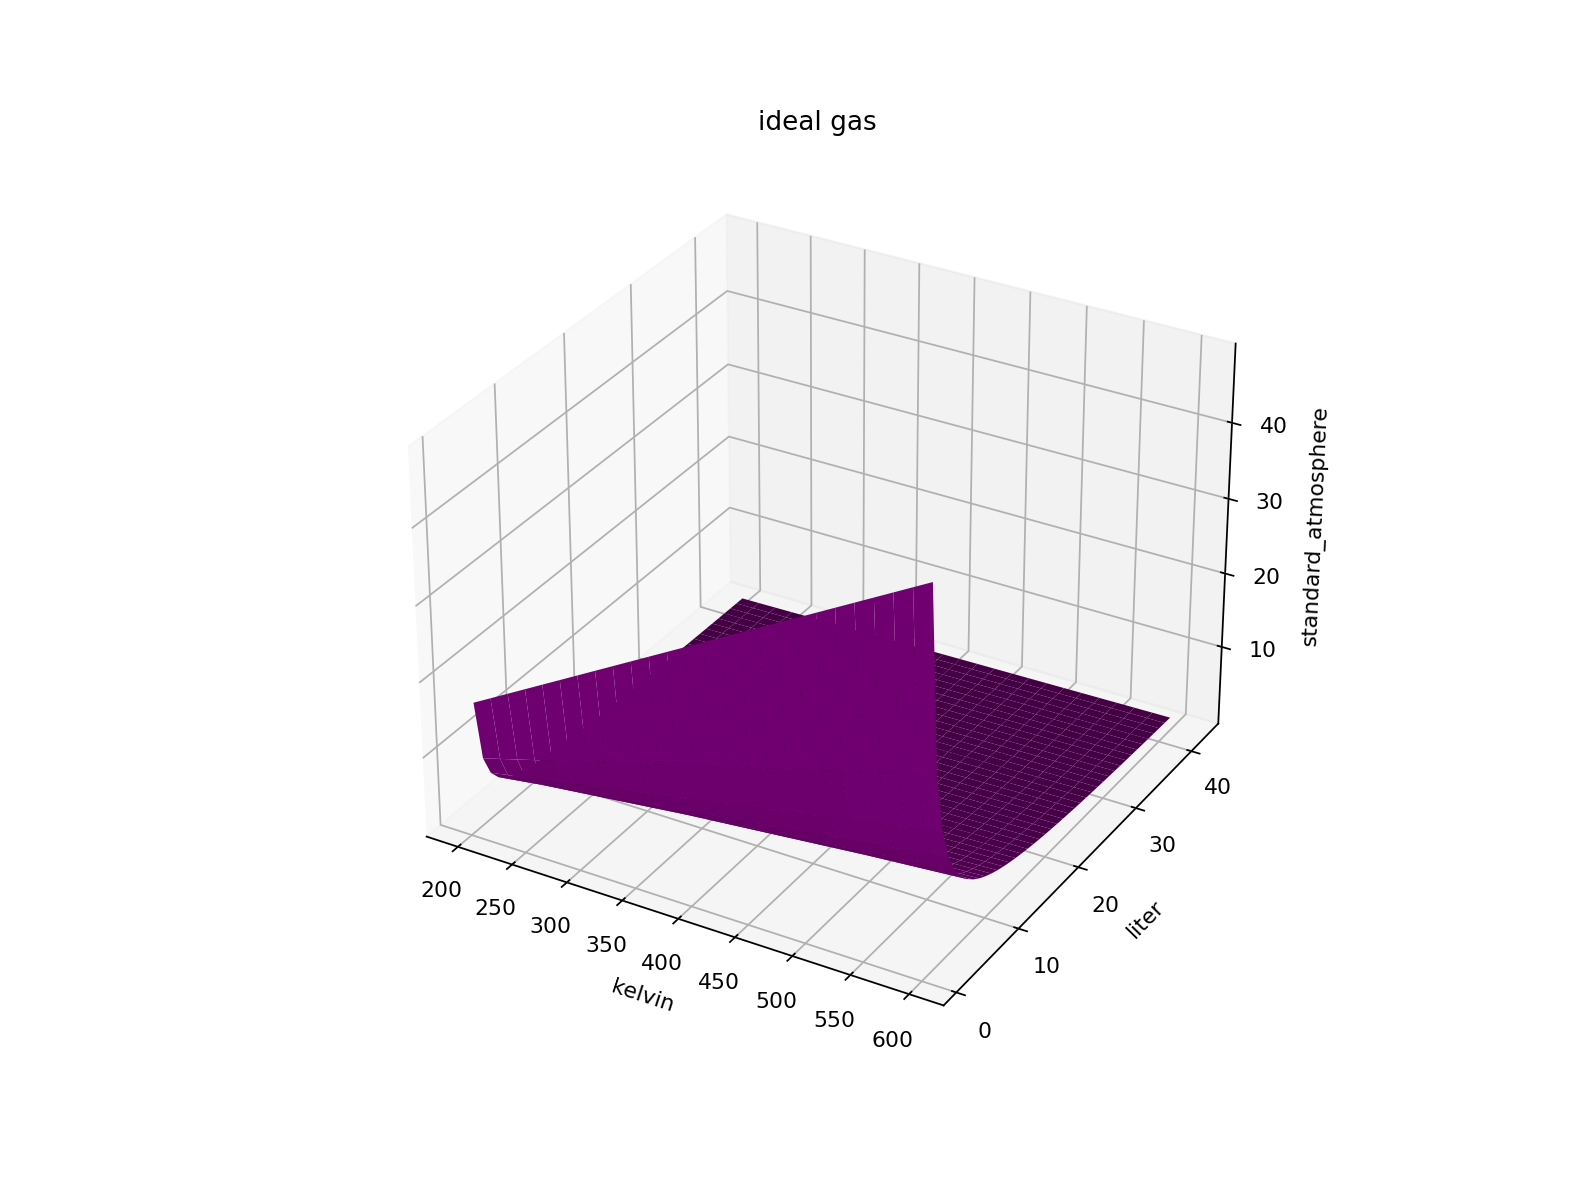

Text(0.5, 0.92, 'ideal gas')

In [6]:
# Get the pressure of an ideal gas (Eq. 1)
Pgrid_ideal = n*R*Tgrid/Vgrid

# Graph the pressure of the ideal gas
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_ideal, color='purple') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(Pgrid_ideal.units)
ax.set_title("ideal gas")

### Your turn - Visualizing vdw a
Using the same temperature-volume state space as before, make a new gridded variable, Pgrid_vdw_a (Eq. 2), for Argon gas. 

<IPython.core.display.Javascript object>


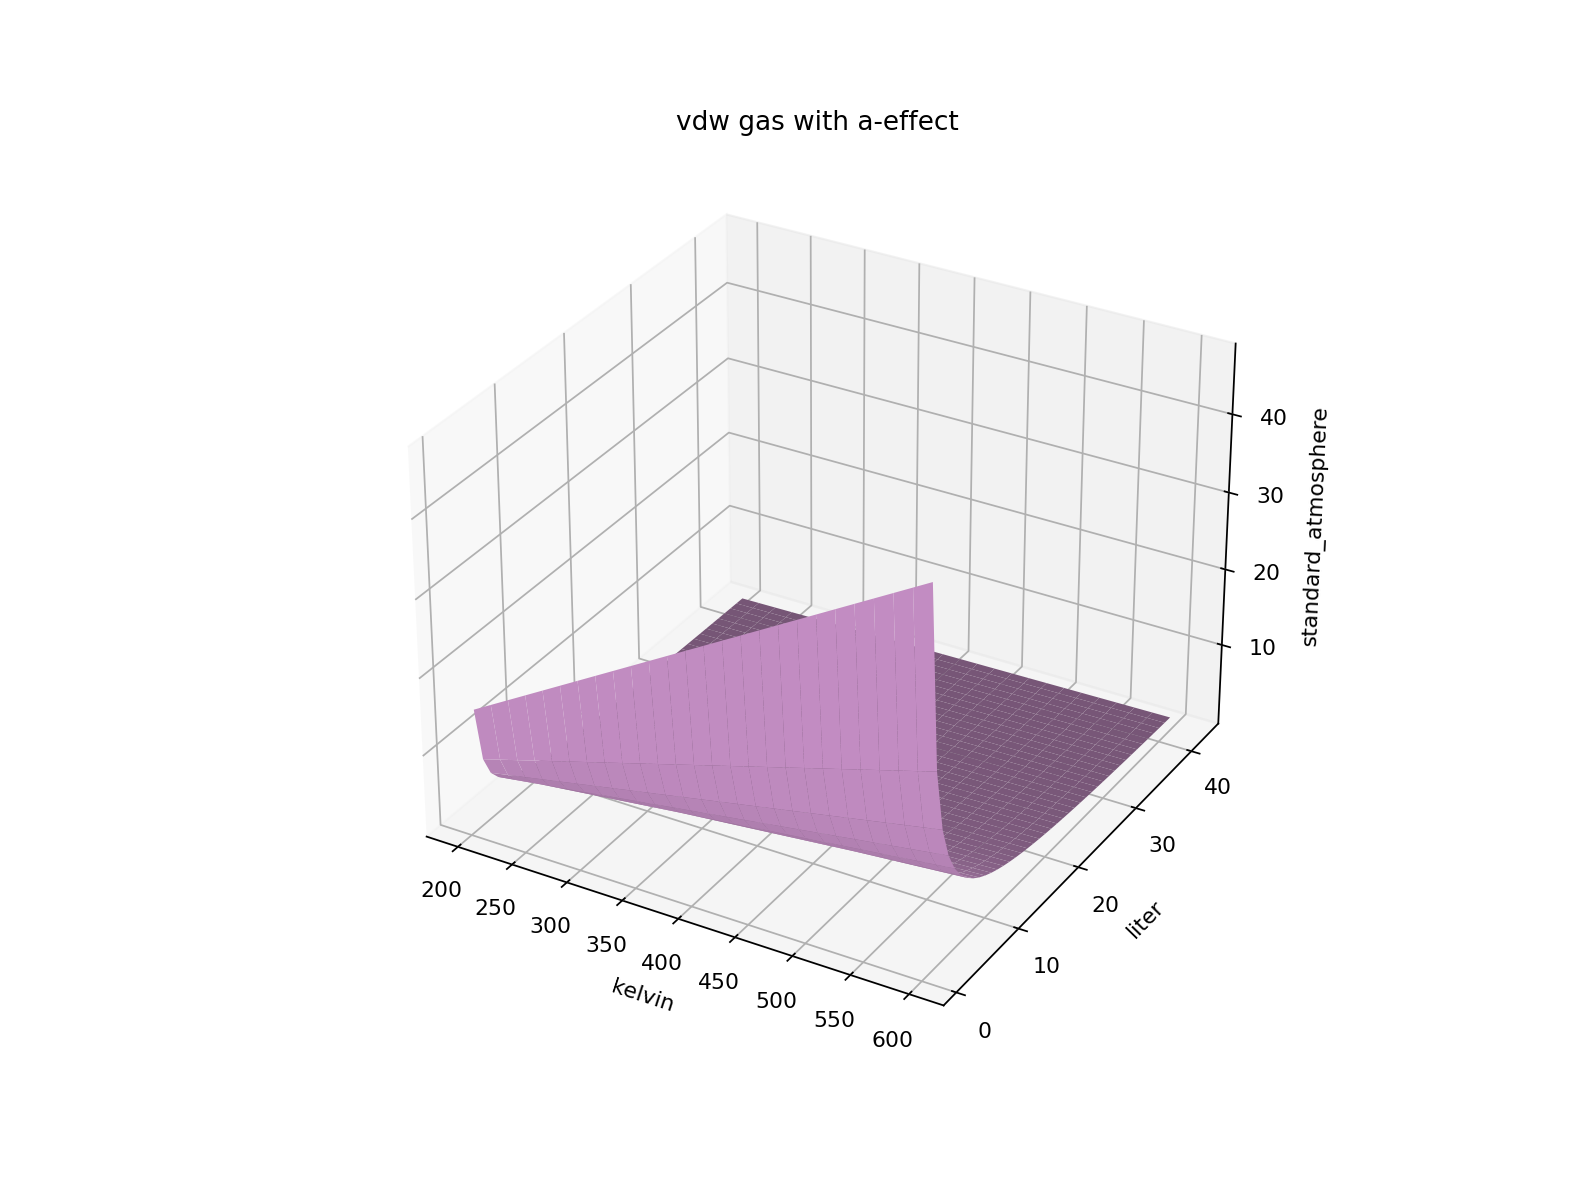

Text(0.5, 0.92, 'vdw gas with a-effect')

In [7]:
# Calculate the pressure of a vdw gas with the a-effect (Eq. 2); call the resulting pressure Pgrid_vdw_a
### BEGIN SOLUTION
Pgrid_vdw_a = n*R*Tgrid/Vgrid-n**2*a/Vgrid**2
### END SOLUTION

# Graph it as a thermodynamic surface
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_vdw_a, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(Pgrid_vdw_a.units)
ax.set_title("vdw gas with a-effect")
### END SOLUTION

### Visualizing the a-effect
You've probably noticed that it's kind of hard to tell the difference between the thermodynamic surfaces you just generated. That's good in a way -- it gives us in the accuracy of the ideal gas law! But if we really want to get quantitative (and we do!), we should examine the *difference* between them.  

In the cell below, we calculate a new thermodynamic surface as a percent difference, as described by Eq. (5).

<IPython.core.display.Javascript object>


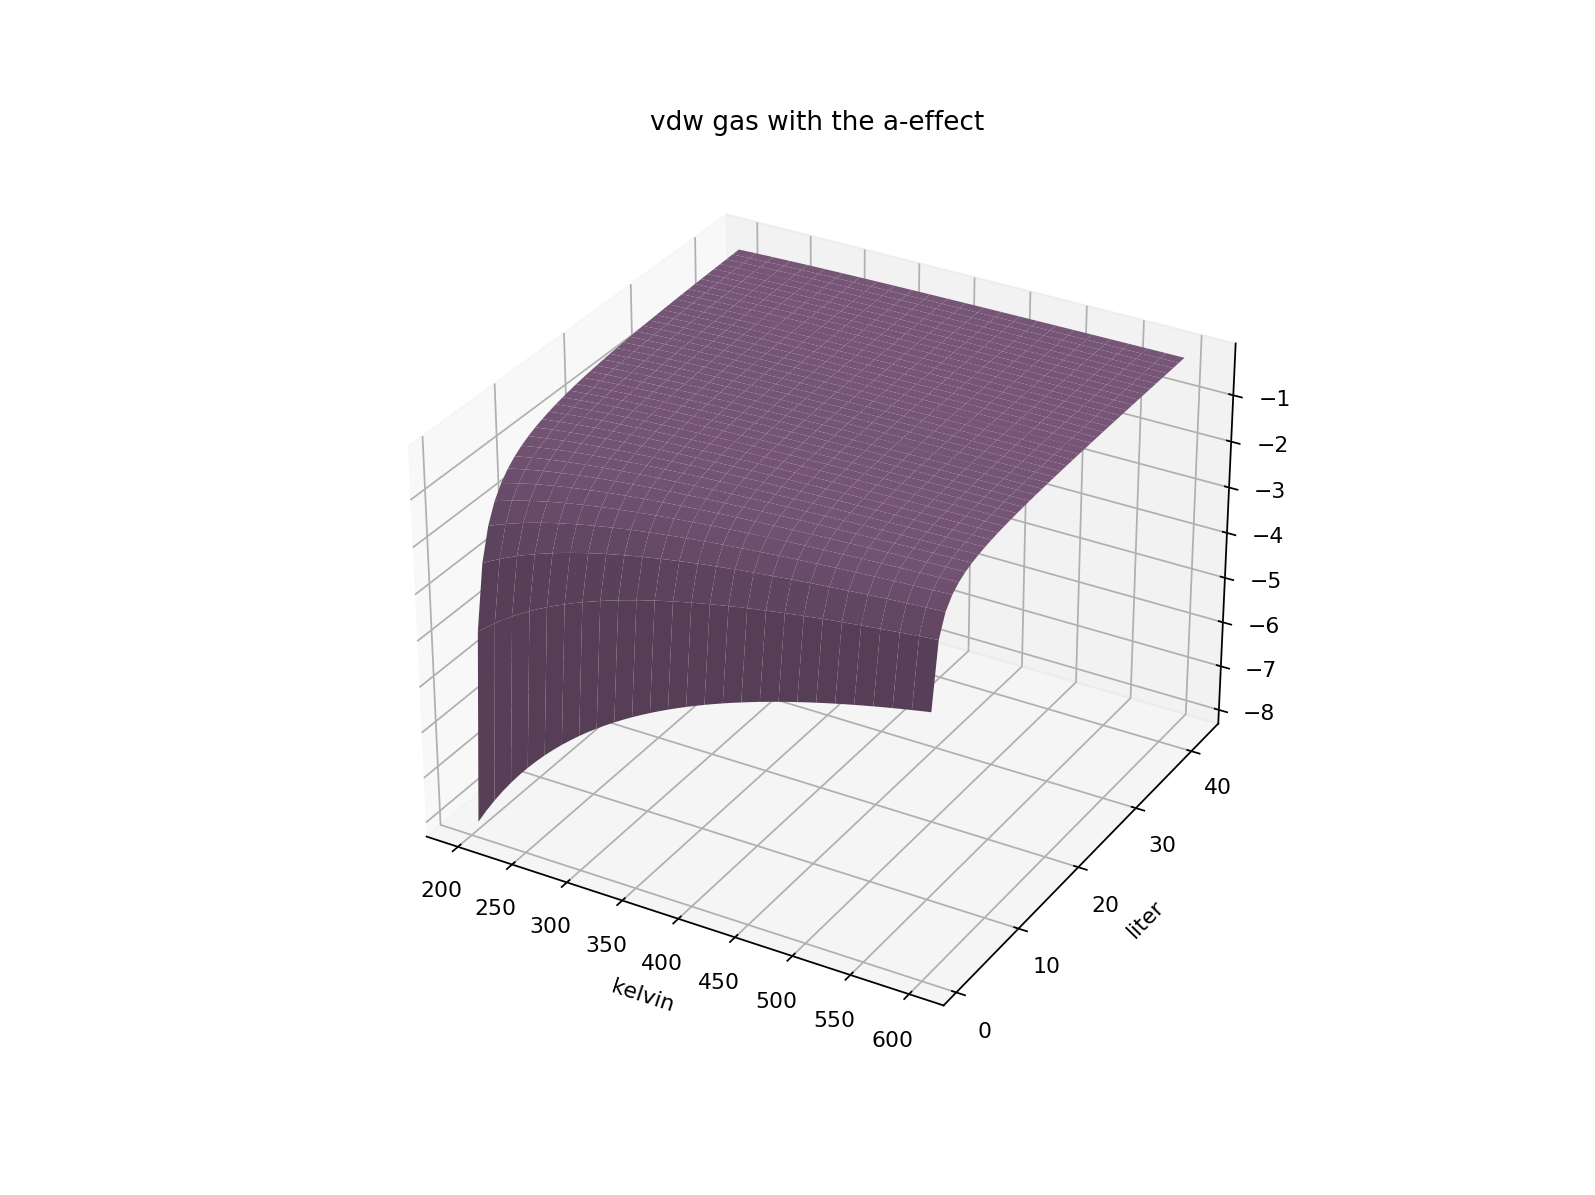

Text(0.5, 0.92, 'vdw gas with the a-effect')

In [8]:
# Calculate the a-effect using Eq. (5)
a_effect = (Pgrid_vdw_a - Pgrid_ideal)/Pgrid_ideal * 100

# Graph it as a thermodynamic surface
ax = PL.plot_surface(Tgrid, Vgrid, a_effect, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(a_effect.units)
ax.set_title("vdw gas with the a-effect")

### Pause for Analysis
In the cell below, record some thoughts about this. Does the a-effect have the sign you expected based on the mathematical form of Eq. (2)? Can you relate what's going on to any molecular-level properties? 

### Your turn - Visualizing vdw b
Using the same temperature-volume state space as before, make a new gridded variable, Pgrid_vdw_b (Eq. 3), for Argon gas. 

<IPython.core.display.Javascript object>


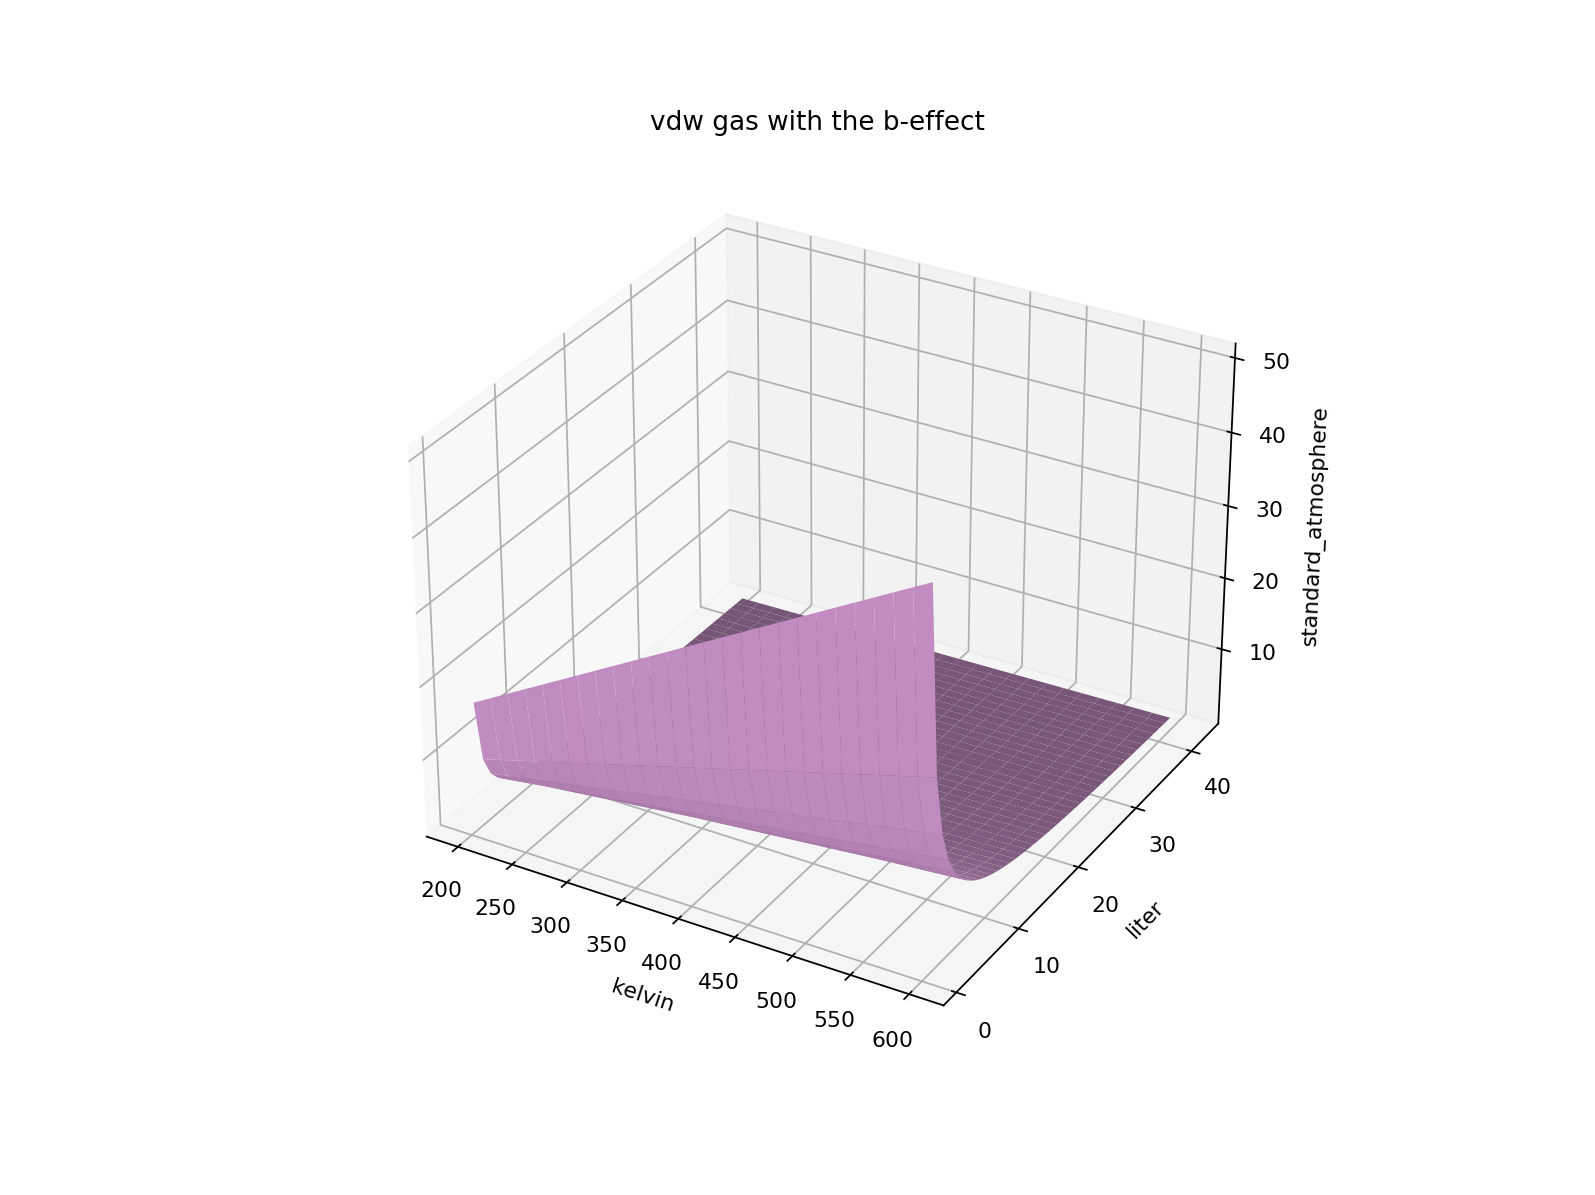

Text(0.5, 0.92, 'vdw gas with the b-effect')

In [9]:
# Calculate the pressure of a vdw gas with the b-effect (Eq. 3); call the resulting pressure Pgrid_vdw_b
### BEGIN SOLUTION
Pgrid_vdw_b = n*R*Tgrid/(Vgrid-n*b)
### END SOLUTION

# Graph it as a thermodynamic surface
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_vdw_b, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(Pgrid_vdw_a.units)
ax.set_title("vdw gas with the b-effect")
### END SOLUTION

### Your turn - Visualizing the b-effect
Just as we saw before, it's hard to tell the difference between the thermodynamic surface you just generated and the previous ones. In the cell below, calculate a new thermodynamic surface as a percent difference, as described by Eq. (6). Then graph *that* surface in a temperature-volume state space. Add appropriate labeling, etc.

<IPython.core.display.Javascript object>


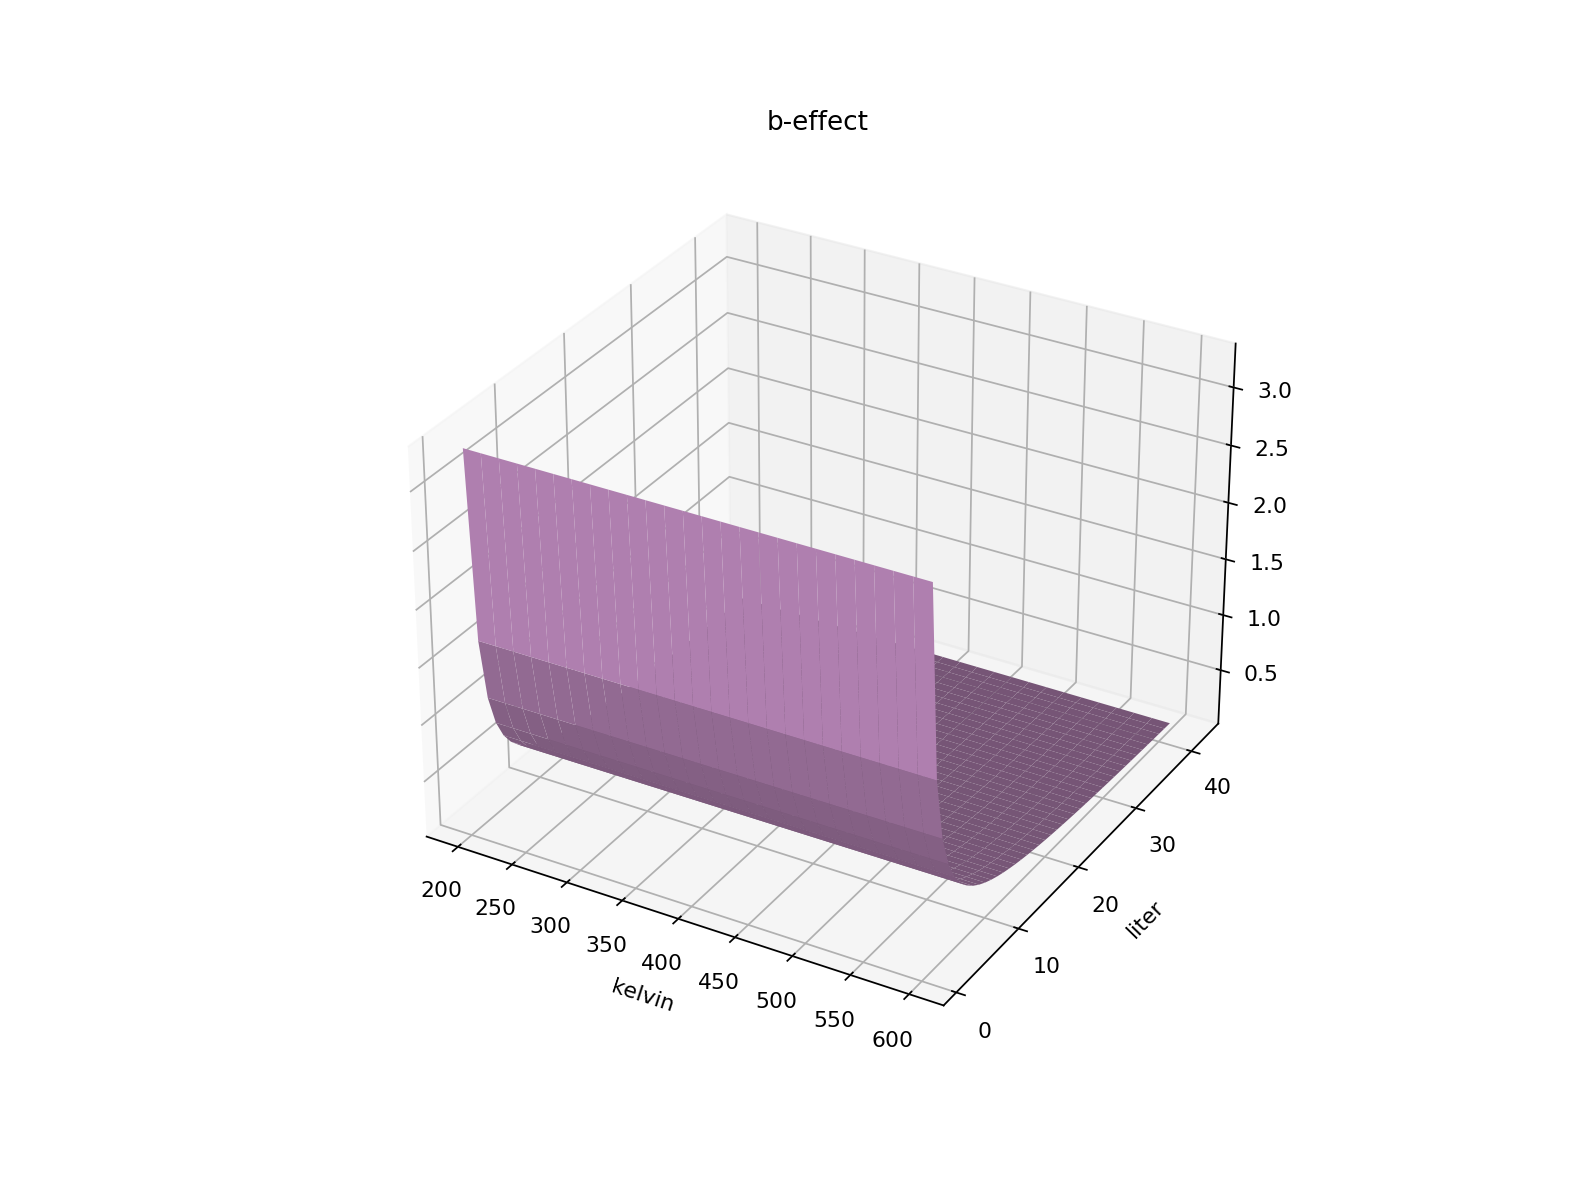

Text(0.5, 0.92, 'b-effect')

In [10]:
# Calculate the b-effect using Eq. (6)
### BEGIN SOLUTION
b_effect = (Pgrid_vdw_b - Pgrid_ideal)/Pgrid_ideal * 100
### END SOLUTION

# Graph the b-effect as a thermodynamic surface
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, b_effect, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(a_effect.units)
ax.set_title("b-effect")
### END SOLUTION

### Pause for Analysis
In the cell below, record some thoughts about this. Does the b-effect have the sign you expected based on the mathematical form of Eq. (3)? Can you relate what's going on to any molecular-level properties? 

### Your turn - Visualizing vdw a and b together
Using the same temperature-volume state space as before, make a new gridded variable, Pgrid_vdw (Eq. 4), for Argon gas. 

<IPython.core.display.Javascript object>


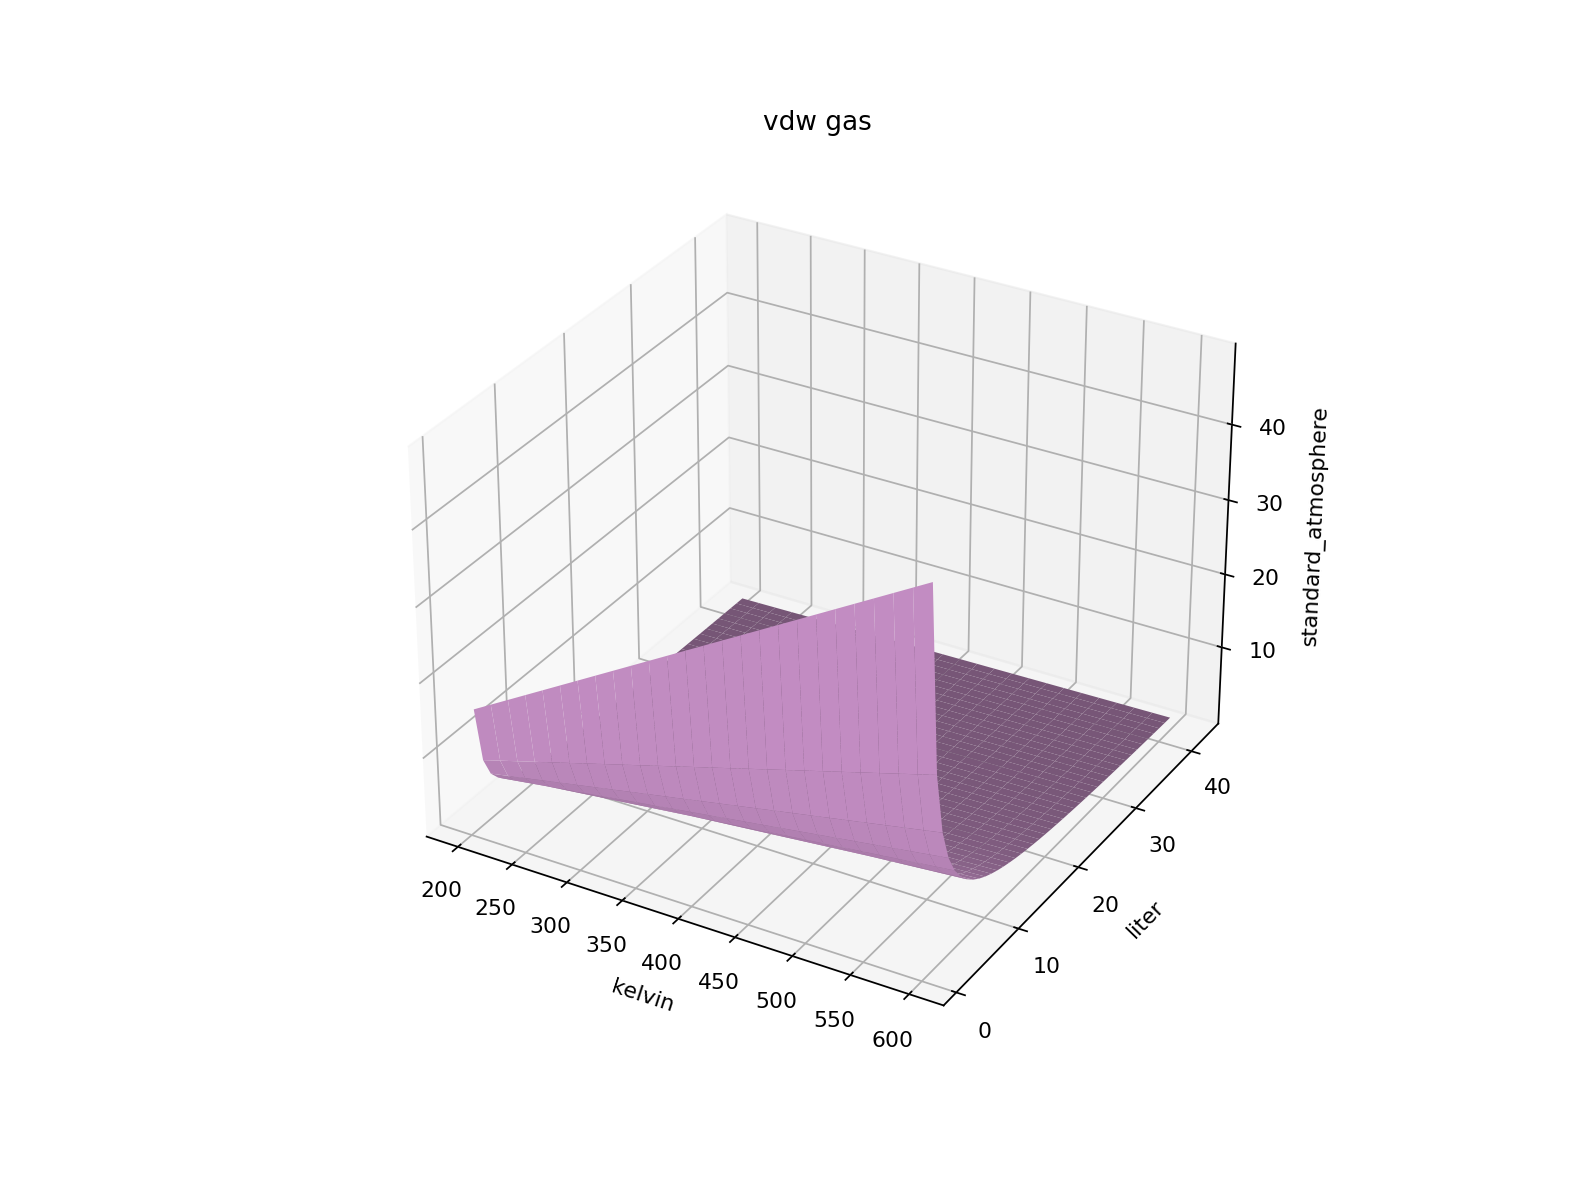

Text(0.5, 0.92, 'vdw gas')

In [11]:
# Calculate the pressure of a vdw gas with the a- and b-effects combined (Eq. 3); call the resulting pressure Pgrid_vdw
### BEGIN SOLUTION
Pgrid_vdw = n*R*Tgrid/(Vgrid-n*b) -n**2*a/Vgrid**2
### END SOLUTION

# Graph it as a thermodynamic surface
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid_vdw, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(Pgrid_vdw_a.units)
ax.set_title("vdw gas")
### END SOLUTION

### Your turn - Visualizing the a- and b-effects toether
In the cell below, calculate a new thermodynamic surface as a percent difference, as described by Eq. (7). Then graph *that* surface in a temperature-volume state space. Add appropriate labeling, etc.

<IPython.core.display.Javascript object>


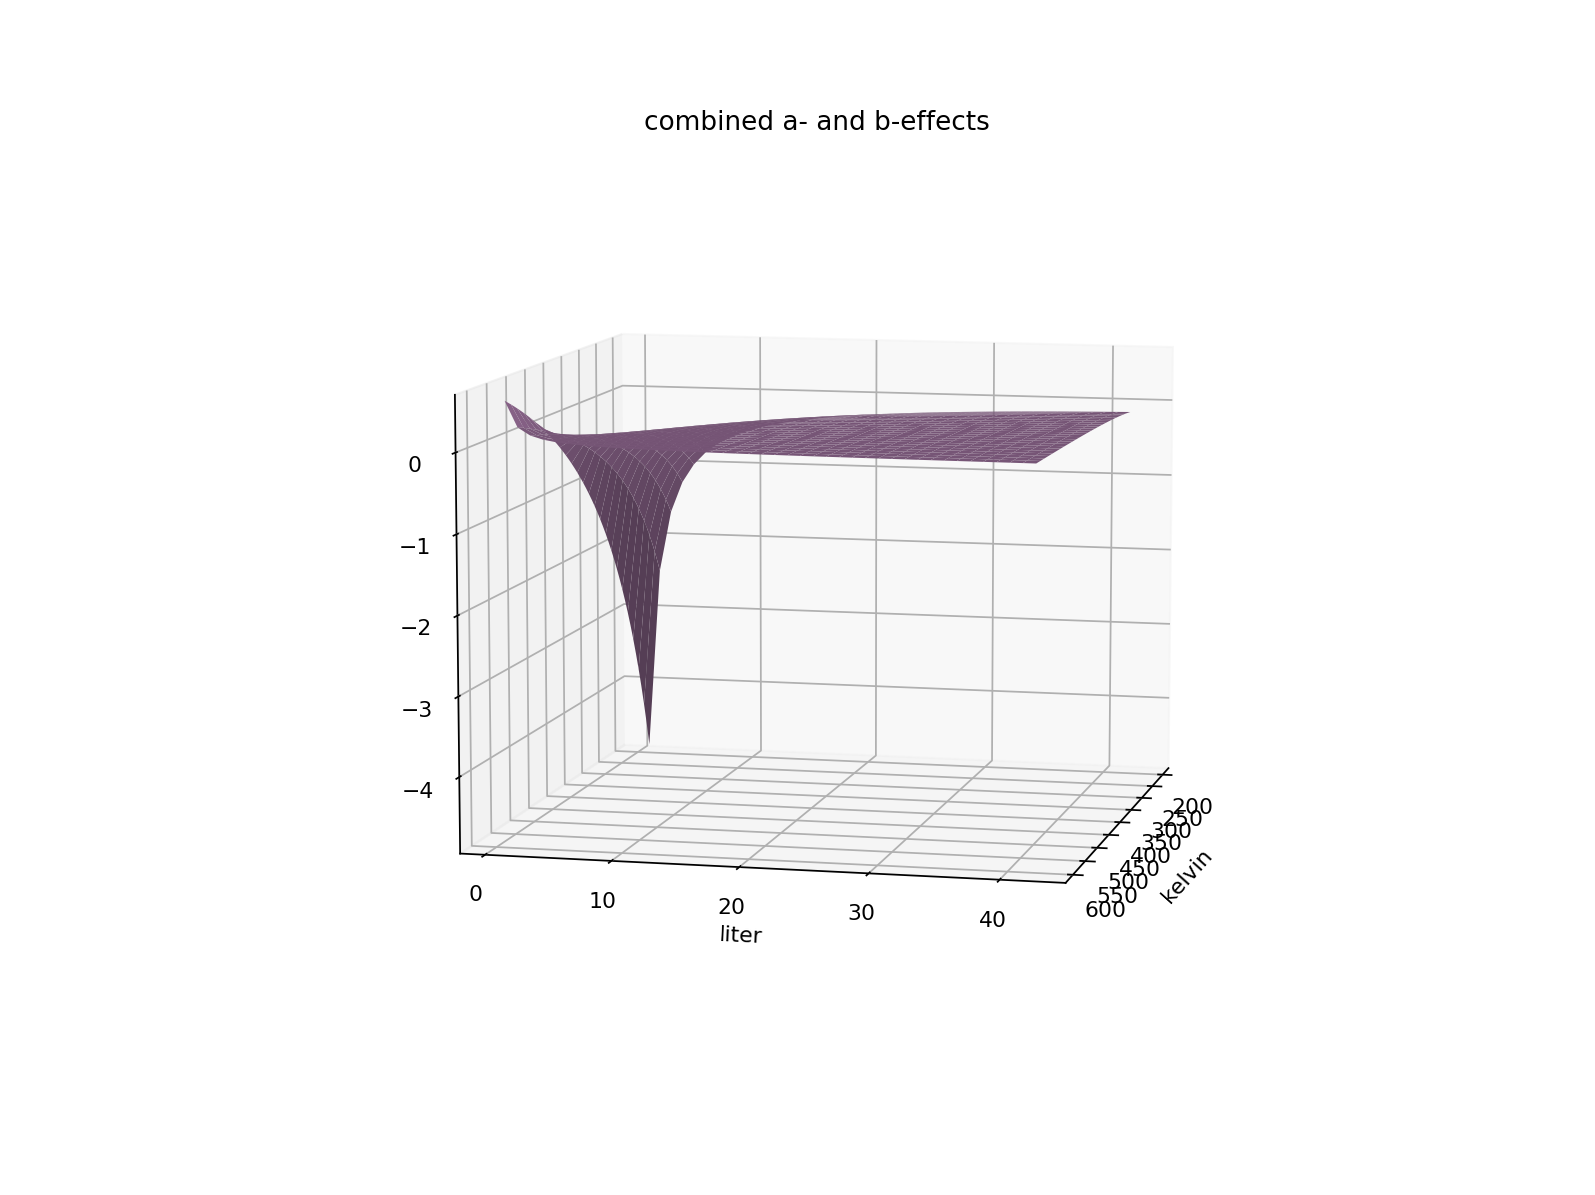

Text(0.5, 0.92, 'combined a- and b-effects')

In [12]:
# Calculate the a- and b-effect using Eq. (7)
### BEGIN SOLUTION
vdw_effect = (Pgrid_vdw - Pgrid_ideal)/Pgrid_ideal * 100
### END SOLUTION

# Graph the combined effects as a thermodynamic surface
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, vdw_effect, color='plum') # Make the mesh plot P(V,T)
ax.set_xlabel(Tgrid.units)
ax.set_ylabel(Vgrid.units)
ax.set_zlabel(a_effect.units)
ax.set_title("combined a- and b-effects")
### END SOLUTION

### Pause for Analysis
In the cell below, record some thoughts about this. How do you explain what you're seeing from a mathematical perspective? How do you explain what you're seeing from a molecular perspective?

### Clean-up
We're at the end of the notebook. It's good practice to use the Kernel/Restart & Run All, just to make sure your code works from top to bottom (since that's what your instructor will do!). If there are any errors or warnings, fix them.

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Three steps for finishing up
Assuming all this has gone smoothly, there will be three more steps (but read this carefully before carrying them out):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page
